In [41]:
import paho.mqtt.client as mqtt
import mediapipe as mp
import cv2
import time
import pandas as pd



In [38]:

class CameraControl:
    #MQTT methods
    def on_connect(self,client, userdata, flags, rc):
        print("Connected with result code " + str(rc))
        client.subscribe("test/topic")
        client.subscribe("test2/topic")


    def on_message(self,client, userdata, msg):
        if msg.topic == "test/topic":
            print(msg.topic+" "+str(msg.payload))
        elif msg.topic == "test2/topic":
            print("Test2")

    def __init__(self):
        self.client = mqtt.Client()
        self.client.on_connect = self.on_connect
        self.client.on_message = self.on_message

        self.client.connect("localhost", 1883, 60)

    def getRealTimeCamera(self,selectData,maxDatasets):
        mp_drawing = mp.solutions.drawing_utils
        mp_holistic = mp.solutions.holistic
        cap = cv2.VideoCapture(0)
        # Initiate holistic model
        data = []
        dataCounter = 0
        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            
            while cap.isOpened() and selectData and dataCounter<maxDatasets:
                ret, frame = cap.read()
                
                # Recolor Feed
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                # Make Detections
                results = holistic.process(image)
                # print(results.face_landmarks)
                
                # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
                
                # Recolor image back to BGR for rendering
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                
                # Draw face landmarks
                #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
                
                # Right hand
                mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

                # Left Hand
                mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

                # Pose Detections
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

                #print(type(results.left_hand_landmarks))
                print(dataCounter)
                if results.left_hand_landmarks and results.right_hand_landmarks:
                    datasetLeftHand = [i for i in results.left_hand_landmarks.landmark]
                    datasetRightHand = [i for i in results.right_hand_landmarks.landmark]
                    data.append(datasetLeftHand + datasetRightHand)
                    dataCounter+=1

                print(datasetLeftHand[0])
            
                cv2.imshow('Raw Webcam Feed', image)
                

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

        cap.release()
        cv2.destroyAllWindows()
        return data


#camera1.client.loop_forever()


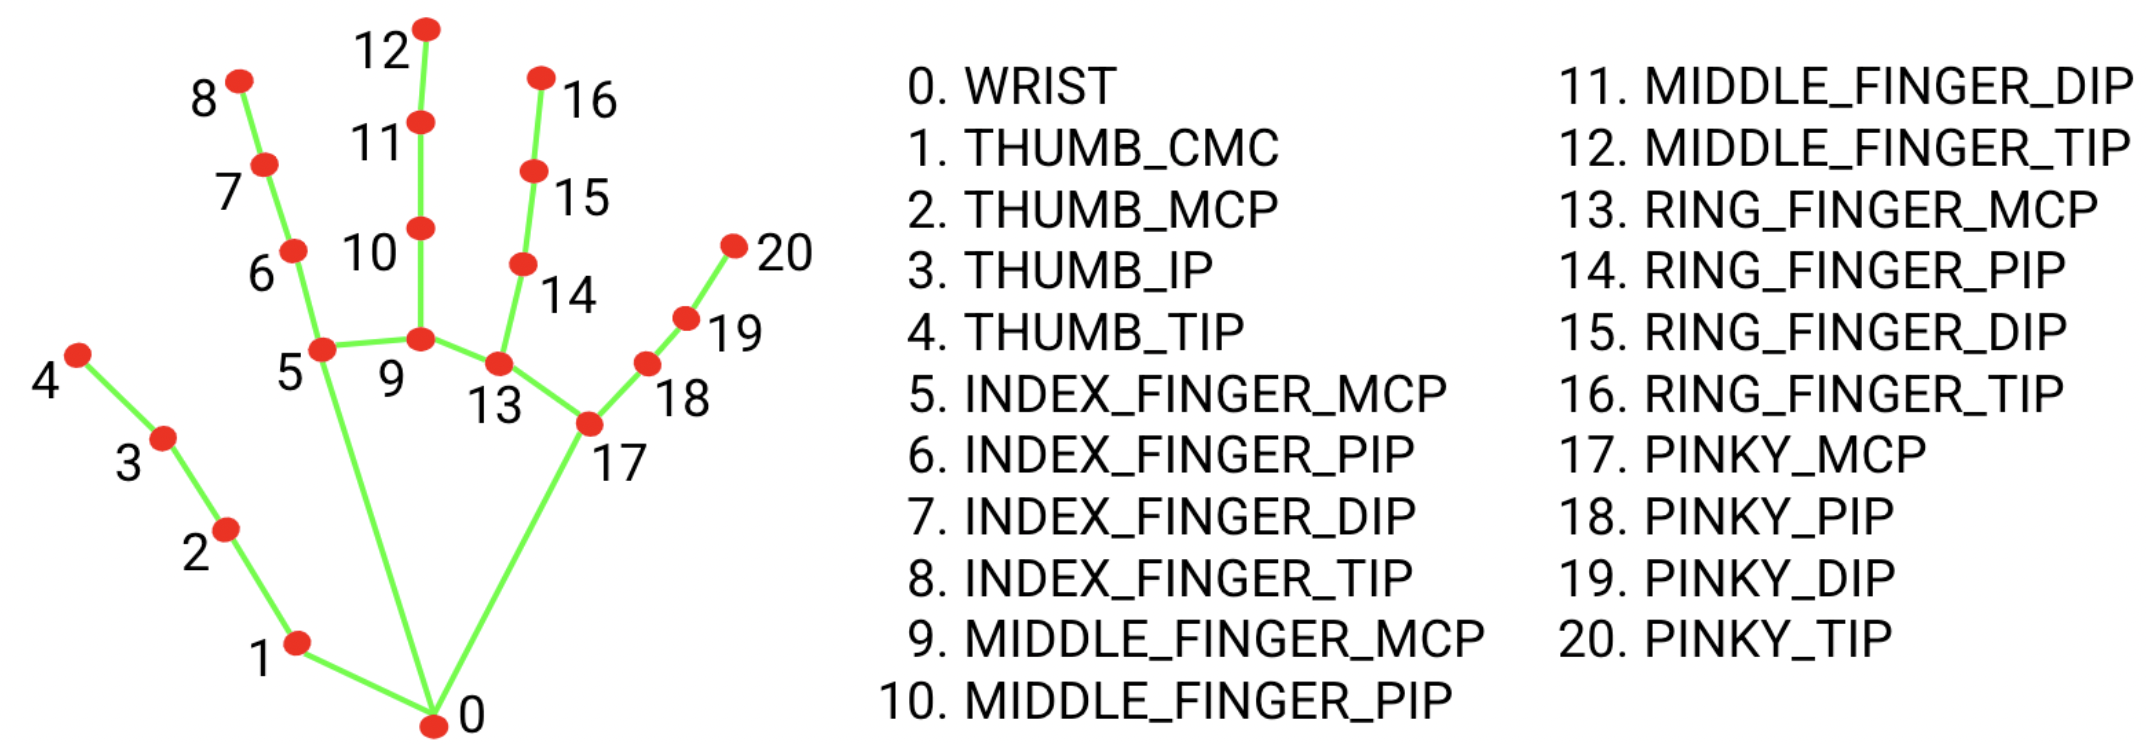

In [25]:
test = data[40]
test[20].x

0.7849754095077515

In [45]:
#collect data
listOfStates = ["screw","nextState","solder"]
columnsData = ["l_wrist","l_thumb_cmc","l_thumb_mcp","l_thumb_ip","l_thumb_tip",
               "l_index_finger_mcp","l_index_finger_pip","l_index_finger_dip","l_index_finger_tip",
               "l_middle_finger_mcp","l_middle_finger_pip","l_middle_finger_dip","l_middle_finger_tip",
               "l_ring_finger_mcp","l_ring_finger_pip","l_ring_finger_dip","l_ring_finger_tip",
               "l_pinky_mcp","l_pinky_pip","l_pinky_dip","l_pinky_tip",
               "r_wrist","r_thumb_cmc","r_thumb_mcp","r_thumb_ip","r_thumb_tip",
               "r_index_finger_mcp","r_index_finger_pip","r_index_finger_dip","r_index_finger_tip",
               "r_middle_finger_mcp","r_middle_finger_pip","r_middle_finger_dip","r_middle_finger_tip",
               "r_ring_finger_mcp","r_ring_finger_pip","r_ring_finger_dip","r_ring_finger_tip",
               "r_pinky_mcp","r_pinky_pip","r_pinky_dip","r_pinky_tip"]
path_out = 'C:\\Users\\Jona\\Documents\\FH\\6-Semester\\Assistenzsysteme\\Projektarbeit\\Assistenzsysteme\\'

columnsDataxyz = []
for i in columnsData:
    columnsDataxyz.append(i+"_x")
    columnsDataxyz.append(i+"_y")
    columnsDataxyz.append(i+"_z")
columnsDataxyz.append("state")

numOfRep = 3
camera1 = CameraControl()
for state in listOfStates:
    data = []
    datasave = []
    for idxRep in range(numOfRep):
        data.append(camera1.getRealTimeCamera(True,50))
        
        for dataset in data[idxRep]:
            datasettmp = []
            for i in dataset:
                print(i)
                datasettmp.append(i.x)
                datasettmp.append(i.y)
                datasettmp.append(i.z)
            datasettmp.append(state)
            datasave.append(datasettmp)

    dfsave = pd.DataFrame(data = datasave,columns=columnsDataxyz)
    dfsave.to_csv(path_out+state+".csv",sep=";",index=False)
    


0
0
0
0
0
0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
x: 0.8461000919342041
y: 0.5957776308059692
z: 8.97748222428163e-08

x: 0.8132257461547852
y: 0.5732064247131348
z: -0.014397629536688328

x: 0.7871773838996887
y: 0.5382053256034851
z: -0.022676726803183556

x: 0.7684953212738037
y: 0.5041874051094055
z: -0.030997928231954575

x: 0.7526521682739258
y: 0.4735167622566223
z: -0.03839157894253731

x: 0.801554262638092
y: 0.4731926918029785
z: -0.00039741399814374745

x: 0.7942860722541809
y: 0.43187886476516724
z: -0.01072187814861536

x: 0.7923950552940369
y: 0.4084317684173584
z: -0.02139311283826828

x: 0.7928014993667603
y: 0.38803285360336304
z: -0.029389183968305588

x: 0.8233677744865417
y: 0.46441298723220825
z: -0.0011812702286988497

x: 0.8187497854232788
y: 0.4166613221168518
z: -0.009649522602558136

x: 0.8166158199310303
y: 0.39053356647491455
z: -0.01772203855216503

x: 0.

In [33]:
test = data[0][10]